In [1]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns; sns.set_theme(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely import geometry
import matplotlib.pyplot as plt
import os

In [2]:
# path to training and validation data
training_data_path = os.path.join(os.getcwd(),'data/dam forecast train.csv')
val_data_path = os.path.join(os.getcwd(),'data/dam forecast val.csv')

In [3]:
max_value = 20000

In [4]:
# load up validation data and do some cleaning/sorting
val_data = pd.read_csv(val_data_path)
val_data = val_data.reindex(sorted(val_data.columns), axis=1)
val_data = (val_data[val_data['dam_area'] < max_value])
val_data.replace([np.inf, -np.inf], 0, inplace=True)
val_data.head()

,SRC_DATE,acq_date_dec,acq_month,acq_year,class,class_name,dam_area,file_name,geometry,rain_0_months before,...,tavg_1_months before,tavg_2_months before,tavg_3_months before,tavg_4_months before,tavg_5_months before,tavg_6_months before,tavg_7_months before,tavg_8_months before,tavg_9_months before,water_area
0,20151012,2015.769231,10,2015,0,dam and water,1467.191148,arcgisonline_132898_pred_and_score.tif,POINT (117.3172965191077 -33.24564247144878),9.043823,...,12.835136,11.108263,10.531229,12.044368,12.067635,16.236391,20.395378,24.588543,23.805340,400.256079
1,20160808,2016.615385,8,2016,0,dam and water,7575.018970,arcgisonline_70618_pred_and_score.tif,POINT (152.9625759629707 -26.43549796464562),30.879414,...,16.208225,16.421938,19.850100,22.161938,24.166159,25.166771,24.075779,23.361519,23.210749,5781.220903
2,20150329,2015.230769,3,2015,0,dam and water,2028.126533,arcgisonline_84979_pred_and_score.tif,POINT (142.9804044837108 -37.77391478774938),22.954985,...,20.310444,18.668152,16.997301,15.661266,13.949310,11.053338,8.662997,8.203583,9.625609,581.212166
3,20151215,2015.923077,12,2015,0,dam and water,569.161178,arcgisonline_101081_pred_and_score.tif,POINT (145.618767566165 -38.4325091507143),37.716213,...,15.805417,15.925524,11.613432,9.590775,9.022965,10.216203,12.452333,14.021166,16.439243,317.463008
4,20160416,2016.307692,4,2016,0,dam and water,3367.296500,arcgisonline_125002_pred_and_score.tif,POINT (118.0078021793126 -30.57147183423009),31.052204,...,24.274788,26.393480,26.532434,24.433882,23.749607,21.477095,14.928035,12.299461,11.371953,508.559500


In [5]:
val_data.describe()

,SRC_DATE,acq_date_dec,acq_month,acq_year,class,dam_area,rain_0_months before,rain_10_months before,rain_11_months before,rain_12_months before,...,tavg_1_months before,tavg_2_months before,tavg_3_months before,tavg_4_months before,tavg_5_months before,tavg_6_months before,tavg_7_months before,tavg_8_months before,tavg_9_months before,water_area
count,1.209200e+04,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,...,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000,12092.000000
mean,2.015545e+07,2015.933790,5.828482,2015.485445,0.190705,2344.871555,40.918843,45.221640,44.962239,45.244155,...,18.793099,17.742988,16.479472,15.531919,14.758715,14.472987,14.662065,15.651571,16.916612,1015.266387
std,1.107125e+04,1.067814,4.079297,1.118725,0.587426,2348.181108,37.842385,38.215597,41.110925,45.556805,...,4.730413,5.087960,5.396381,5.376100,5.460510,5.691831,6.102881,6.356929,6.114102,1483.583021
min,2.011031e+07,2011.230769,1.000000,2011.000000,0.000000,0.230876,0.000000,0.000000,0.000000,0.000000,...,4.473178,3.767548,3.512479,3.298177,3.368938,3.450339,2.843800,0.398076,-0.436497,0.000000
25%,2.015021e+07,2015.153846,2.000000,2015.000000,0.000000,1015.463916,16.516137,19.817642,17.224566,15.305293,...,15.569793,13.878939,11.961521,11.159833,10.363666,9.876673,9.625276,10.289359,11.974917,240.309850
50%,2.016021e+07,2016.153846,4.000000,2016.000000,0.000000,1628.328433,31.021363,36.471107,34.359282,33.143732,...,19.233997,17.744738,16.212720,14.814304,13.500537,12.785109,12.729320,14.105670,16.503898,557.248085
75%,2.016082e+07,2016.615385,10.000000,2016.000000,0.000000,2700.323579,51.395601,61.257016,62.046124,61.125591,...,22.280751,21.581215,20.469092,19.461695,18.183304,18.228338,19.289775,20.977194,22.199329,1149.713375
max,2.019122e+07,2019.923077,12.000000,2019.000000,2.000000,19984.675202,409.263367,447.493988,613.029053,652.822998,...,32.635075,32.718910,33.075680,32.662399,33.186134,33.115395,32.708469,34.131081,32.591122,15953.594289


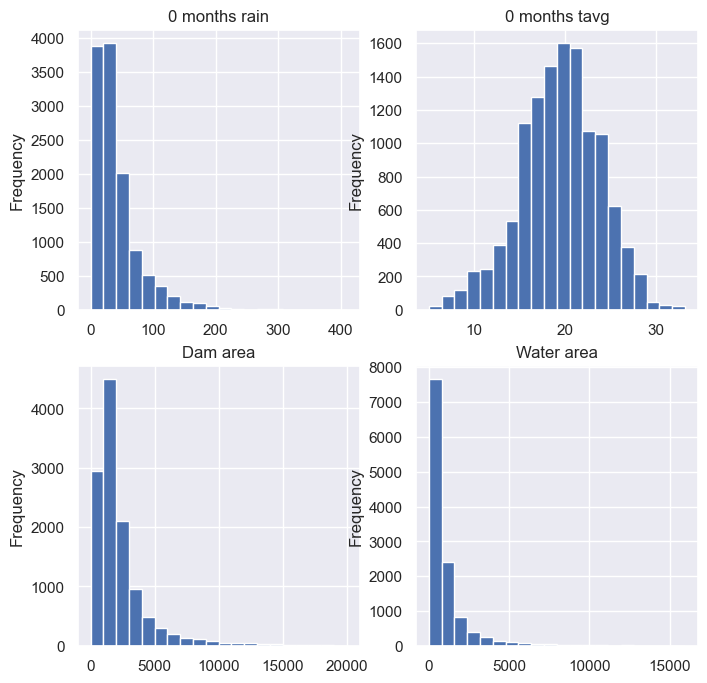

In [6]:
sns.set(rc={'figure.figsize':(8,8)})

fig, axes = plt.subplots(nrows=2, ncols=2)

val_data['rain_0_months before'].plot(kind='hist',ax=axes[0,0], title='0 months rain',bins=20)
val_data['tavg_0_months before'].plot(kind='hist',ax=axes[0,1], title='0 months tavg',bins=20)
val_data['dam_area'].plot(kind='hist',ax=axes[1,0], title='Dam area',bins=20)
val_data['water_area'].plot(kind='hist',ax=axes[1,1], title='Water area',bins=20);

In [7]:
# whats the mean water area?
val_data['water_area'].mean()

1015.2663869706191

In [8]:
# if we guess that the water area is always the mean, the mean error is this value
water_area_mae = abs(val_data['water_area'] - val_data['water_area'].mean()).mean()
water_area_mae

885.8515476619349

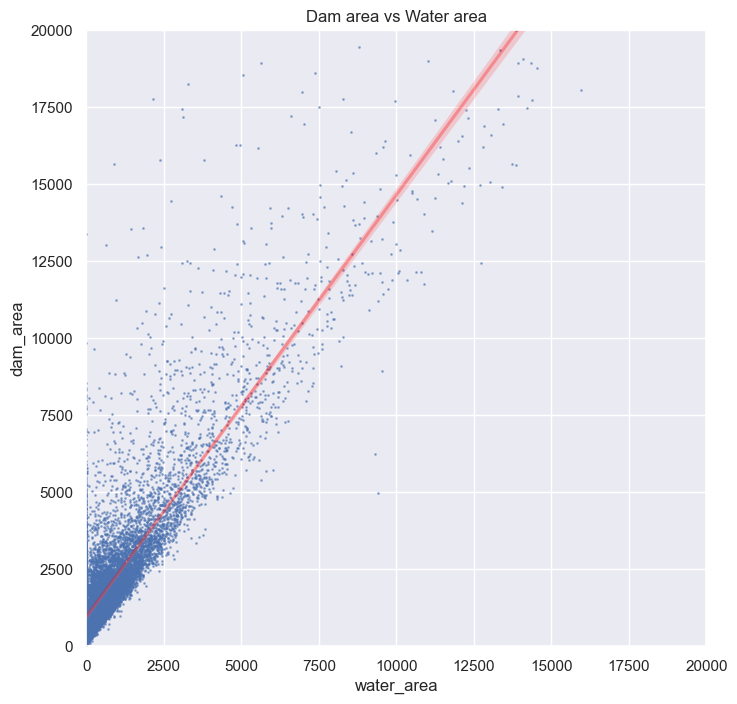

In [9]:
# the relationship between dam area and water area look like this
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.regplot(x="water_area", y="dam_area", data=val_data,
                 scatter_kws={'s':1, 'alpha':0.5},
                 line_kws={"color": "red",'alpha':0.3})
ax.set(ylim=(0, max_value))
ax.set(xlim=(0, max_value))
ax.set(title='Dam area vs Water area');

In [10]:
# use numpy to calc the line of best fit equation
grad, y_intersect = np.polyfit(val_data['water_area'], val_data['dam_area'], 1)
grad, y_intersect

(1.3692740784602375, 954.693608421261)

In [11]:
# there is a decent relationship here as expected, on average the water area is 38% of the dam area
water_to_dam_ratio = (val_data['water_area']/val_data['dam_area']).mean()
water_to_dam_ratio

0.3833069722673188

In [12]:
# if we scale the dam area by 38% it should make the gradiant closer to 1
val_data['dam_area_scaled'] = (val_data['dam_area']*water_to_dam_ratio)

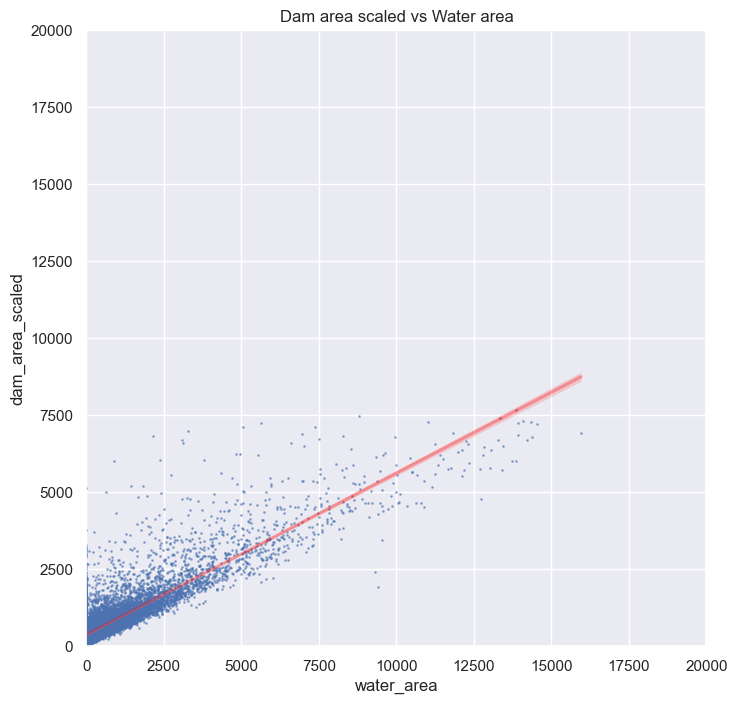

In [13]:
ax = sns.regplot(x="water_area", y="dam_area_scaled", data=val_data,
                 scatter_kws={'s':1, 'alpha':0.5},
                 line_kws={"color": "red",'alpha':0.3}
                )
ax.set(ylim=(0, max_value))
ax.set(xlim=(0, max_value))
ax.set(title='Dam area scaled vs Water area');

In [14]:
# use numpy to calc the line of best fit equation
grad, y_intersect = np.polyfit(val_data['water_area'], val_data['dam_area_scaled'], 1)
grad, y_intersect

(0.5248523012187167, 365.9407164869148)

In [15]:
# the now that we have taken the scaled dam area into account, the mae is much improved
# our model should aim to beat this
scaled_mae = mean_absolute_error(val_data['dam_area_scaled'],val_data['water_area'])
scaled_mae

466.89800117742175

In [18]:
mape = np.mean(np.abs(val_data['water_area'] - val_data['dam_area_scaled'])/val_data['dam_area_scaled'])*100
mape

48.27040937823521